## CASTRO samples for 4 dimensional problem or subproblem 1 of 9 dimensional problem

This Notebook runs the CASTRO algorithm with multiple random seeds for generating feasible samples for the 4 dimensional problem or subproblem 1 of the 9 dimensional problem.

As components we have the polymer PA56, phytic acid, an amino-based component and a metallic component.

It contains the following steps:
1. Initialization
2. CASTRO samples
3. Sample selection by checking distance from experimental data and illustrations
4. Distribution plots
5. Write results to csv files
6. Show results


written by Christina Schenk

last updated on 08/01/2025

tested on Christina's M1 Mac

#### Import python packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from pathlib import Path  
from sklearn.preprocessing import StandardScaler
import sys

sys.path.append('..')
from src.conditionedSampling import *
from src.plot import *
from src.utils import *

### **1. Initialization**

##### Specify the design space: lower and upper bounds for x and y, dim etc.

In [2]:
#Lower and upper bounds for x and y:
#polymer:
PA56_lb = 0.8
PA56_ub = 1.0
#phytic acid:
PhA_lb = 0.0
PhA_ub = 0.05
#amino-based acids:
am_lb = 0.0
am_ub = 0.1
#metallic-based acids:
met_lb = 0.0
met_ub = 0.14

x1_lb = PA56_lb
x1_ub = PA56_ub

x2_lb = PhA_lb
x2_ub = PhA_ub

x3_lb = am_lb
x3_ub = am_ub

x4_lb = met_lb
x4_ub = met_ub

#dimension of design space:
dim = 4
bounds = [[x1_lb,x1_ub],[x2_lb,x2_ub], [x3_lb,x3_ub], [x4_lb,x4_ub]]

#number of samples
n_samp = 100

### **2. CASTRO samples** 
#### Collect samples for all permutations of bounds (all selected or subset of samples selected with checking for distance)

#### Calculate all permutations of bounds

In [3]:
all_perms = []
all_perms += permutations(range(dim))

#### Define algorithm parameters

In [4]:
#dimension of design space:
#dim = 4
tot_samp = 144
prev_bounds = [[x1_lb,x1_ub], [x2_lb,x2_ub], [x3_lb,x3_ub], [x4_lb,x4_ub]]
n_samp = tot_samp//len(all_perms)
tol_norm = 5e-1
num_select = 4
all_select = True
max_rej = n_samp//2

In [5]:
# seeds = [42, 123, 7, 99, 56]
# Call the function
all_val_samples_selected, all_val_samples_mdu_selected, mean_samples, std_samples, mean_samples_mdu, std_samples_mdu = prob_sample_with_bound_permutations(
    prev_bounds=prev_bounds, n_samp=n_samp, tol_norm=tol_norm,
    all_select=all_select, num_select=num_select, max_rej=max_rej,
    dim=dim, verbose=True)

# Verify results
print("Shape of all_val_samples_selected:", all_val_samples_selected.shape)
print("Shape of mean_samples:", mean_samples.shape)
print("Shape of all_val_samples_selected:", all_val_samples_mdu_selected.shape)
print("Shape of mean_samples:", mean_samples_mdu.shape)

Shape of all_val_samples_selected: (5, 97, 4)
Shape of mean_samples: (97, 4)
Shape of all_val_samples_selected: (5, 95, 4)
Shape of mean_samples: (95, 4)


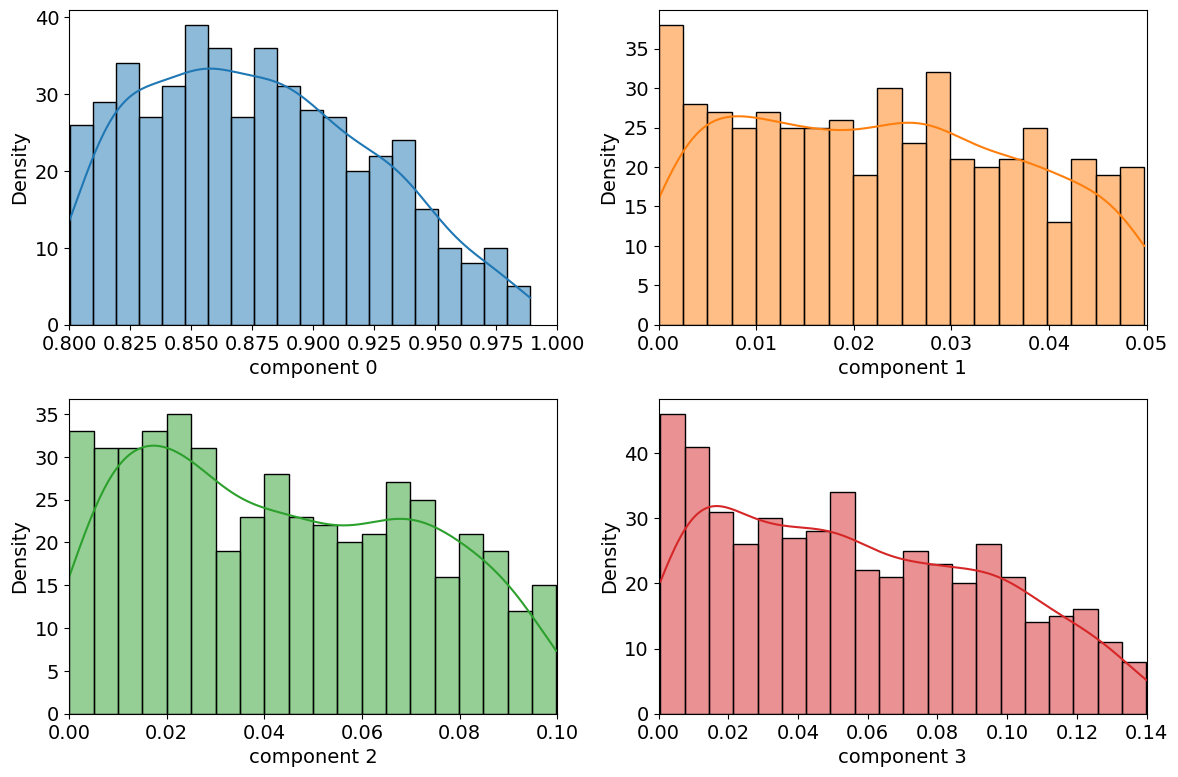

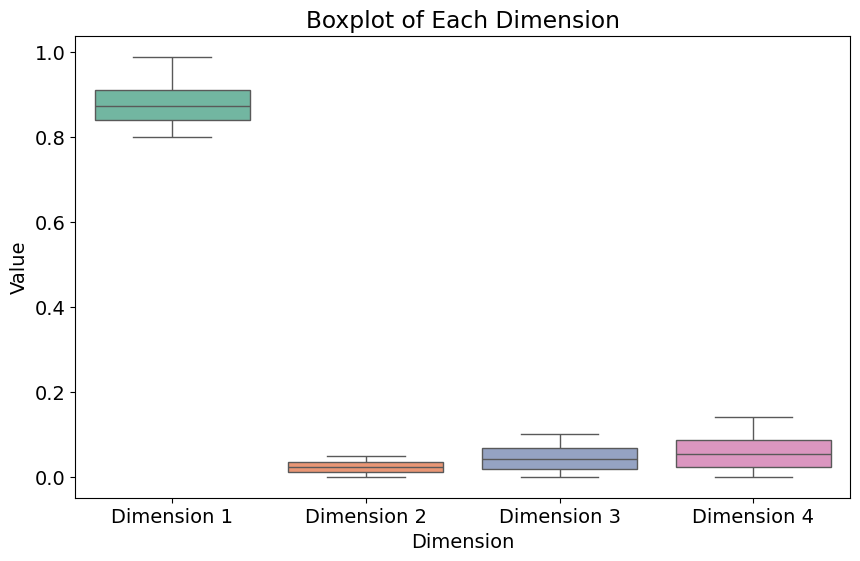

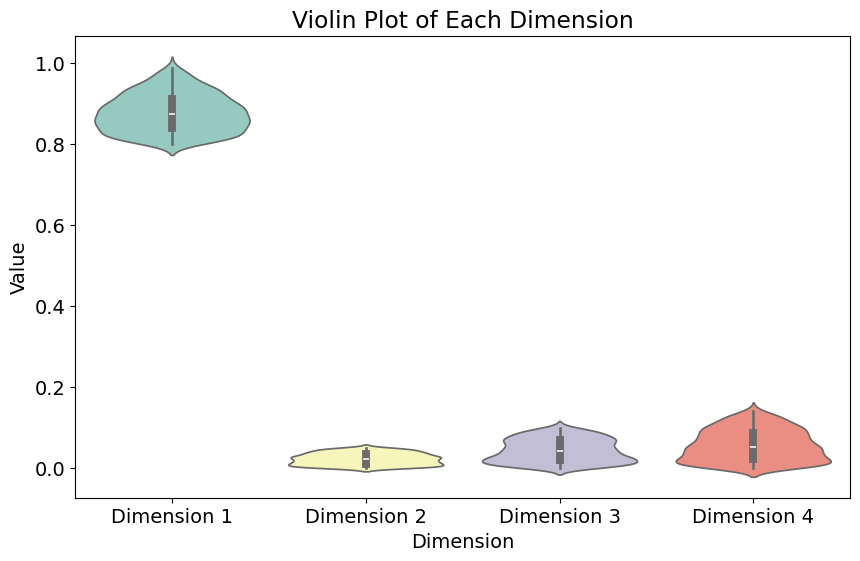

In [6]:
# Combine all samples into a single array (shape: num_seeds * n_samp, n_dim)
combined_samples = all_val_samples_selected.reshape(-1, dim)

# Plot settings
#sns.set(style="whitegrid")
dim_labels = [f"Dimension {i+1}" for i in range(dim)]

# Plot 1: Histograms for each dimension
plt.figure(figsize=(12, 8))
for i in range(dim):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(combined_samples[:, i], bins=20, kde=True, color=f"C{i}")
    #ax.set_title(f"Histogram of {dim_labels[i]}")
    ax.set_xlabel(f"component {i}")
    ax.set_ylabel("Density")
    if bounds is not None and i < len(bounds):
        ax.set_xlim(bounds[i])  # Correct way to set x-limits for each subplot
plt.tight_layout()
plt.show()


# Plot 2: Boxplot for each dimension
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_samples, palette="Set2")
plt.title("Boxplot of Each Dimension")
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.xticks(range(dim), dim_labels)
plt.show()

# Plot 3: Violin Plot for Each Dimension
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_samples, palette="Set3")
plt.title("Violin Plot of Each Dimension")
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.xticks(range(dim), dim_labels)
plt.show()

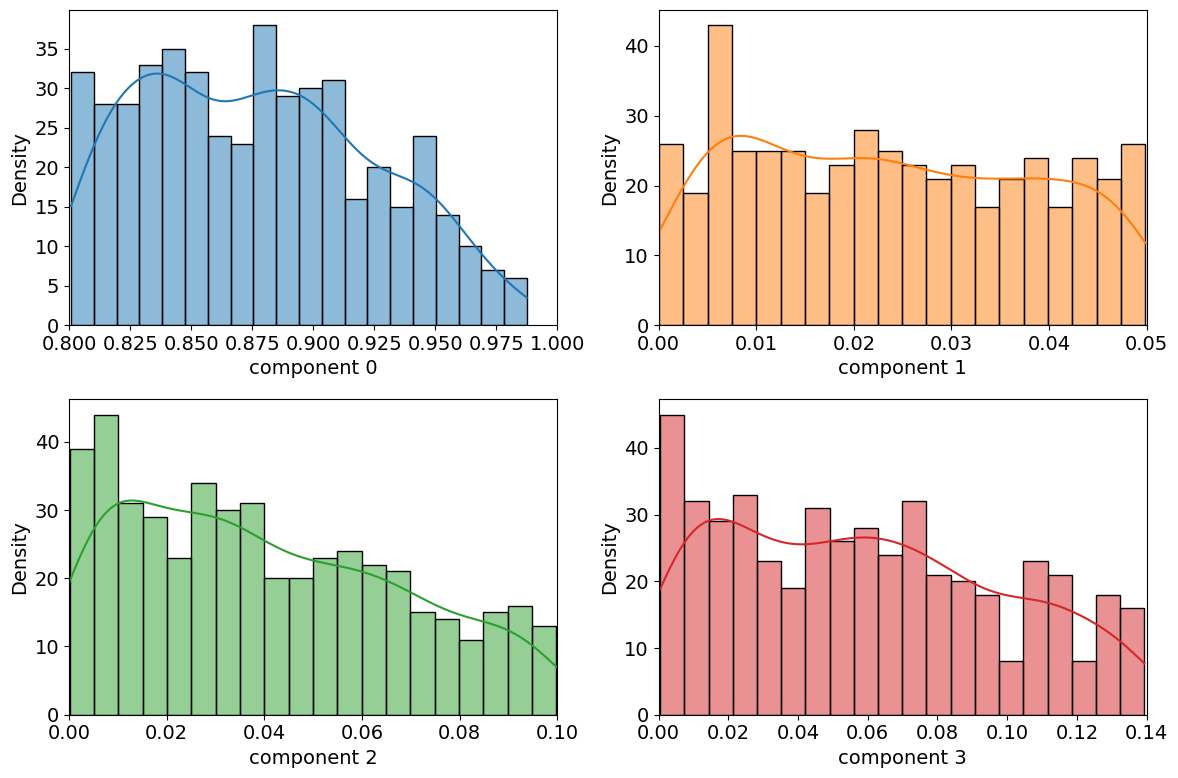

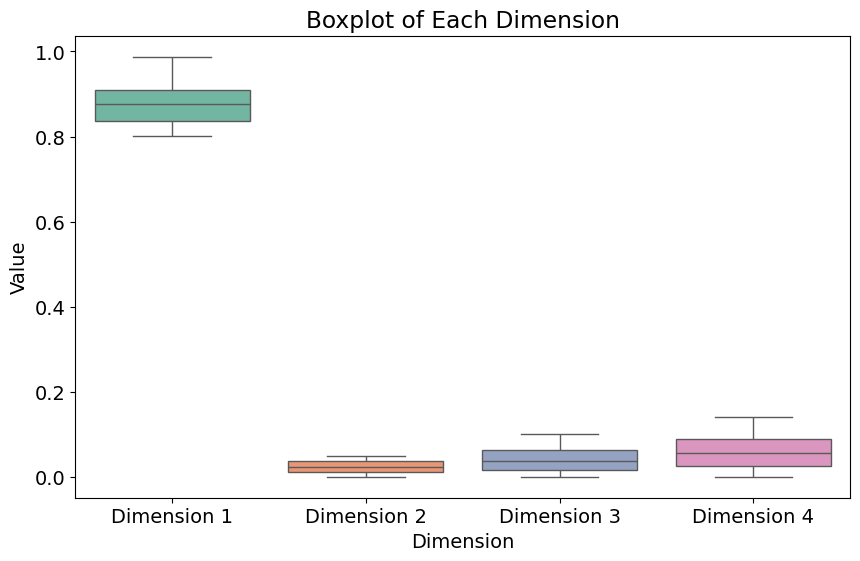

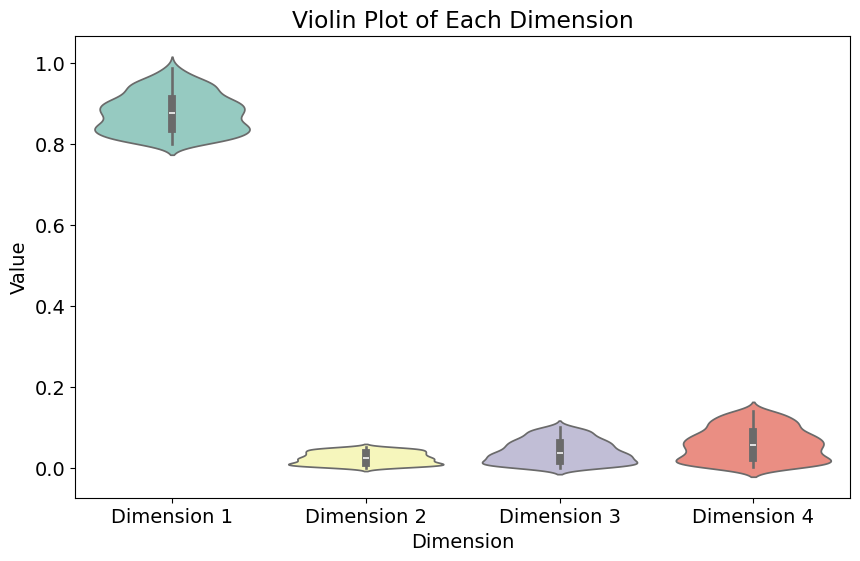

In [7]:
# Combine all samples into a single array (shape: num_seeds * n_samp, n_dim)
combined_samples_2 = all_val_samples_mdu_selected.reshape(-1, dim)

# Plot settings
#sns.set(style="whitegrid")
dim_labels = [f"Dimension {i+1}" for i in range(dim)]

# Plot 1: Histograms for each dimension
plt.figure(figsize=(12, 8))
for i in range(dim):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(combined_samples_2[:, i], bins=20, kde=True, color=f"C{i}")
    #ax.set_title(f"Histogram of {dim_labels[i]}")
    ax.set_xlabel(f"component {i}")
    ax.set_ylabel("Density")
    if bounds is not None and i < len(bounds):
        ax.set_xlim(bounds[i])  # Correct way to set x-limits for each subplot
plt.tight_layout()
plt.show()


# Plot 2: Boxplot for each dimension
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_samples_2, palette="Set2")
plt.title("Boxplot of Each Dimension")
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.xticks(range(dim), dim_labels)
plt.show()

# Plot 3: Violin Plot for Each Dimension
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_samples_2, palette="Set3")
plt.title("Violin Plot of Each Dimension")
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.xticks(range(dim), dim_labels)
plt.show()

In [8]:
# Select most uniform samples
uniform_samples = select_most_uniform_samples(combined_samples, num_samples=90)
uniform_samples2 = select_most_uniform_samples(combined_samples_2, num_samples=90)
print(f"Shape of uniform samples: {uniform_samples.shape}")
print(f"Shape of uniform samples: {uniform_samples2.shape}")

Shape of uniform samples: (90, 4)


In [9]:
all_val_samples = uniform_samples
all_val_samples_mdu = uniform_samples2

### **3. Sample selection by checking distance from experimental data and illustration**

#### Import data and format

In [10]:
filename = './data/Bank_Data-2808_mod_corrected.csv'#Bank_Data_mod_clean.csv'
df = pd.read_csv(filename, sep=';', decimal=",")
#df = df.replace(',','.', regex=True)
df = df.div(100.)
print(df, len(df))
data_array = np.zeros((len(df),dim))
data_array = np.column_stack((df['PA-56'].to_numpy(), df['PhA'], df['am-based'], df['met-based']))


    PA-56    HNT    PhA   CS   BN   THAM   CaBO   ZnBO    Mel  met-based  \
0    1.00  0.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000      0.000   
1    1.00  0.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000      0.000   
2    0.95  0.000  0.017  0.0  0.0  0.033  0.000  0.000  0.000      0.000   
3    0.95  0.000  0.017  0.0  0.0  0.017  0.000  0.017  0.000      0.017   
4    0.95  0.000  0.017  0.0  0.0  0.017  0.017  0.000  0.000      0.017   
..    ...    ...    ...  ...  ...    ...    ...    ...    ...        ...   
70   0.90  0.050  0.000  0.0  0.0  0.000  0.000  0.000  0.050      0.050   
71   0.97  0.020  0.000  0.0  0.0  0.000  0.000  0.000  0.010      0.020   
72   0.95  0.033  0.000  0.0  0.0  0.000  0.000  0.000  0.017      0.033   
73   0.93  0.047  0.000  0.0  0.0  0.000  0.000  0.000  0.023      0.047   
74   0.90  0.067  0.000  0.0  0.0  0.000  0.000  0.000  0.033      0.067   

    am-based  
0      0.000  
1      0.000  
2      0.033  
3      0.017  
4      0.017

#### Standardize data

In [11]:
scaler = StandardScaler().fit(data_array)
data_scaled = scaler.transform(data_array)
scaler2 = StandardScaler().fit(all_val_samples)
all_val_samples_scaled = scaler2.transform(all_val_samples)
scaler3 = StandardScaler().fit(all_val_samples_mdu)
all_val_samples_mdu_scaled = scaler3.transform(all_val_samples_mdu)

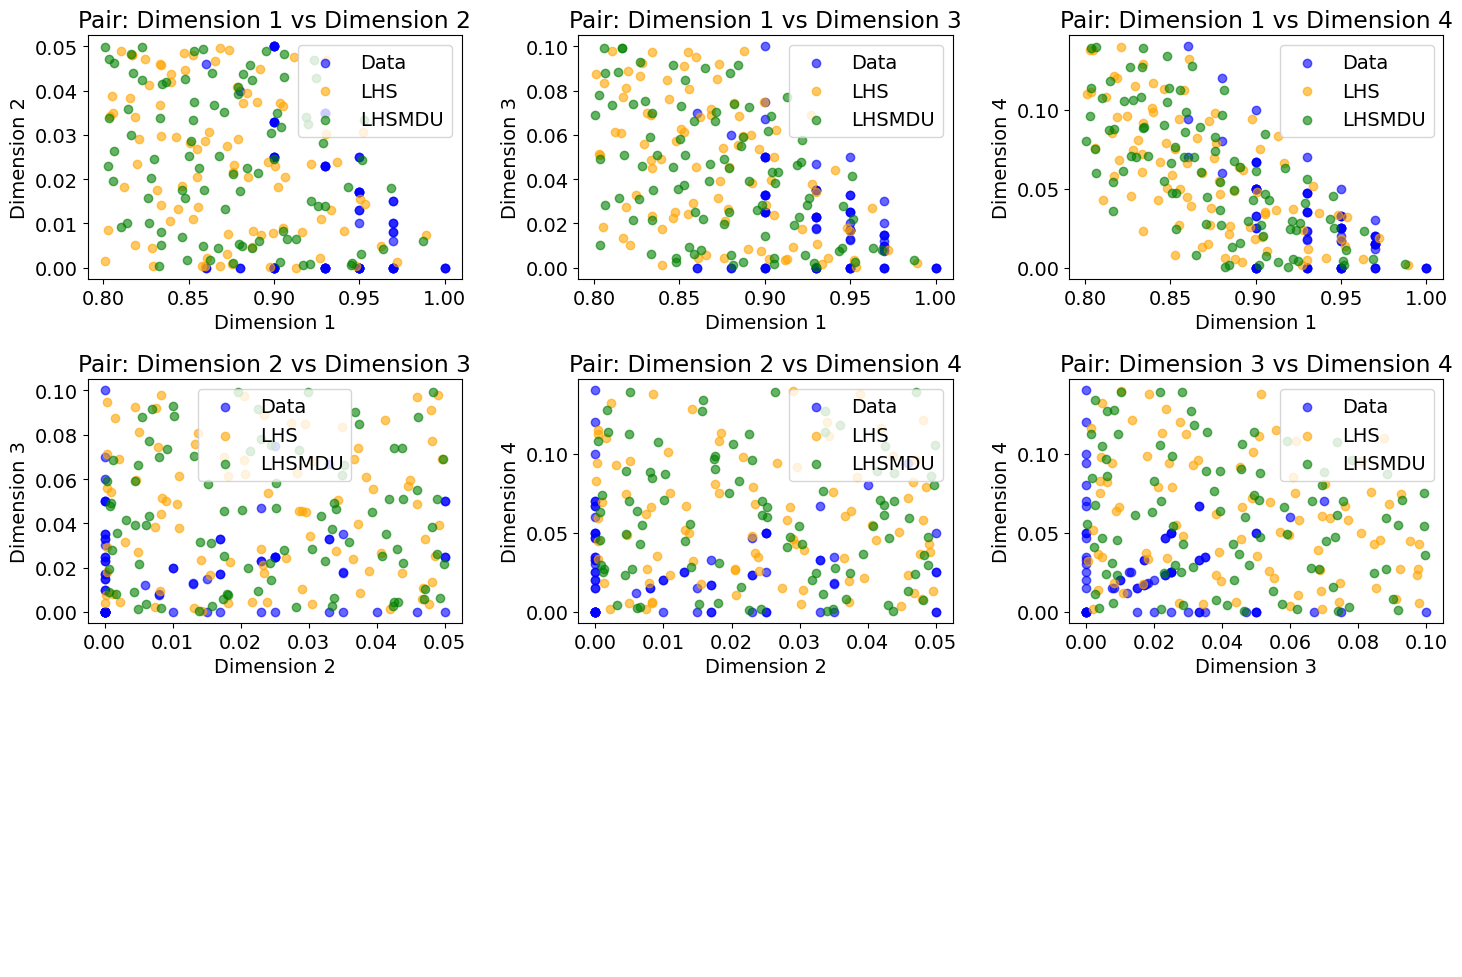

In [12]:

# dim_labels = ['component 1', 'component 2', 'component 3', 'component 4']
# create_pairwise_scatterplots(
#     data=data_scaled,
#     lhs=all_val_samples_scaled,
#     lhsmdu=all_val_samples_mdu_scaled,
#     dim_labels=dim_labels
# )
create_pairwise_scatterplots(
    data=data_array,
    lhs=all_val_samples,
    lhsmdu=all_val_samples_mdu,
    dim_labels=dim_labels
)

In [13]:
print(len(all_val_samples_mdu))
print(len(all_val_samples))

90
90


#### Transform with PCA and plot in two dimensions for both LHS(MDU) samples and Data
#### Check variance ratios

In [14]:
pca = PCA(n_components=2)
Xt1 = pca.fit_transform(data_scaled)
print("variance ratio data", pca.explained_variance_ratio_)
print("variance ratio norm data", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)
Xt2 = pca.fit_transform(all_val_samples_scaled)
print("variance ratio lhs", pca.explained_variance_ratio_)
print("variance ratio norm lhs", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)
Xt3 = pca.fit_transform(all_val_samples_mdu_scaled)
print("variance ratio lhsmdu", pca.explained_variance_ratio_)
print("variance ratio norm lhsmdu", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)

variance ratio data [0.44006323 0.30575109]
variance ratio norm data 0.5358538717903304
[[ 0.73150543 -0.36133158 -0.27833908 -0.50682014]
 [ 0.0008564   0.38285178  0.66771883 -0.63841627]]
variance ratio lhs [0.44038002 0.31040553]
variance ratio norm lhs 0.5387820987535
[[ 0.7494193  -0.24230434 -0.27925865 -0.54924851]
 [-0.08117215  0.24666022  0.75424798 -0.6030587 ]]
variance ratio lhsmdu [0.44314174 0.30460787]
variance ratio norm lhsmdu 0.5377365102503454
[[ 0.7467396  -0.17675104 -0.2708044  -0.58120909]
 [-0.09695432  0.32279805  0.74828083 -0.57138173]]


#### Scatterplot for reduced 2 dimensional PCA points

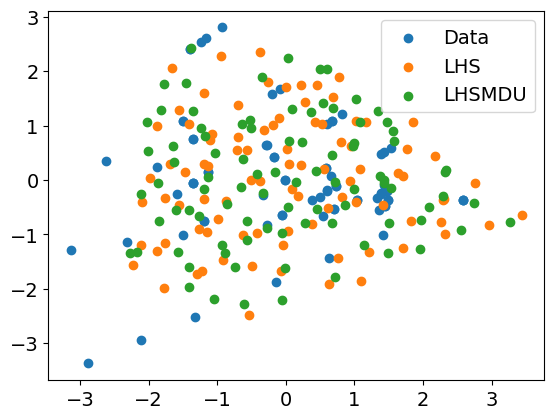

In [15]:
plot_dimred_2dims_both_methods(Xt1, Xt2, Xt3)

#### Select subset of samples that varies the most in terms of distance from the already collected data

In [16]:
tol = 1e-5
tol2 = 1e-5
des_n_samp = 90

tol_samples, tol_samples_LHSMDU, tol_samples_unscaled, tol_samples_LHSMDU_unscaled = select_samples_diff_from_data(exp_data=data_array, samples_LHS=all_val_samples, samples_LHSMDU=all_val_samples_mdu, des_n_samp = des_n_samp, tol = tol, tol2 = tol2)


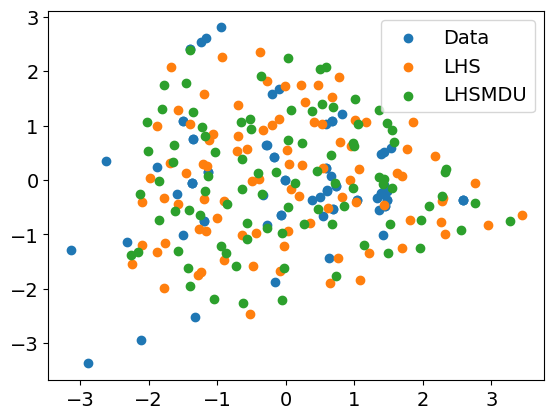

In [17]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
lhs_samples_pca = pca.fit_transform(tol_samples)
lhsmdu_samples_pca = pca.fit_transform(tol_samples_LHSMDU)

plot_dimred_2dims_both_methods(data_pca, lhs_samples_pca, lhsmdu_samples_pca)

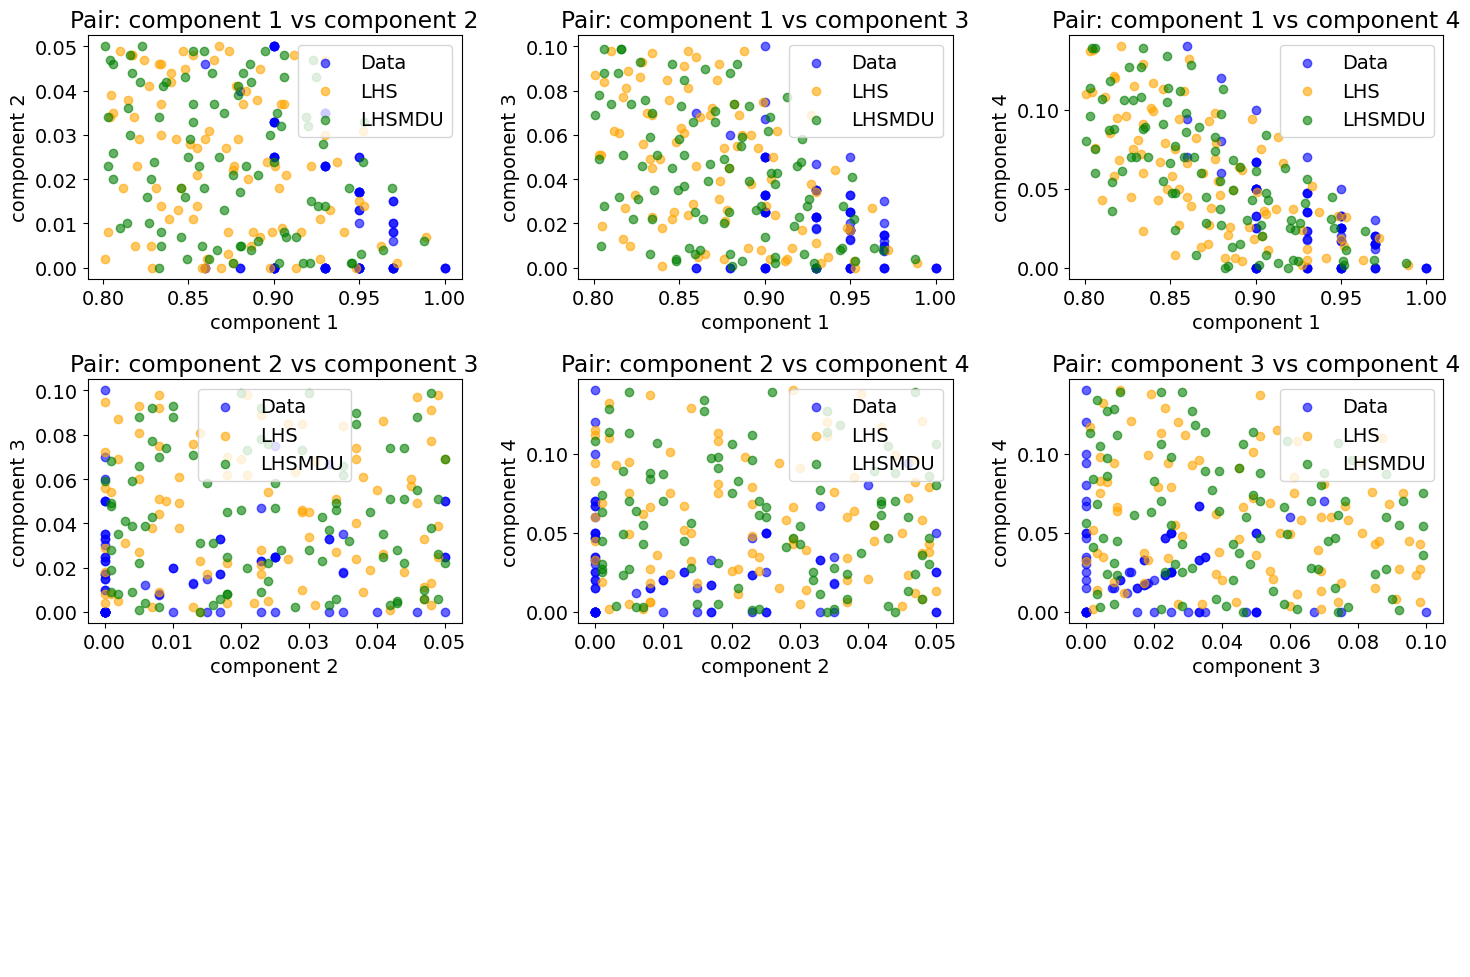

In [18]:
dim_labels = ['component 1', 'component 2', 'component 3', 'component 4']
# create_pairwise_scatterplots(
#     data=data_scaled,
#     lhs=tol_samples,
#     lhsmdu=tol_samples_LHSMDU,
#     dim_labels=dim_labels
# )

create_pairwise_scatterplots(
    data=data_array,
    lhs=tol_samples_unscaled,
    lhsmdu=tol_samples_LHSMDU_unscaled,
    dim_labels=dim_labels
)

#### Test whether all selected samples are feasible

In [19]:
for i in range(len(tol_samples_unscaled)):
    for j in range(dim):
        if tol_samples_unscaled[i,j]<prev_bounds[j][0] or tol_samples_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_unscaled[i,:])
print("-------------------")
for i in range(len(tol_samples_LHSMDU_unscaled)):
    for j in range(dim):
        if tol_samples_LHSMDU_unscaled[i,j]<prev_bounds[j][0] or tol_samples_LHSMDU_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_LHSMDU_unscaled[i,:])

-------------------


 ### **4. Distribution plots**

#### Distribution plots of scaled data

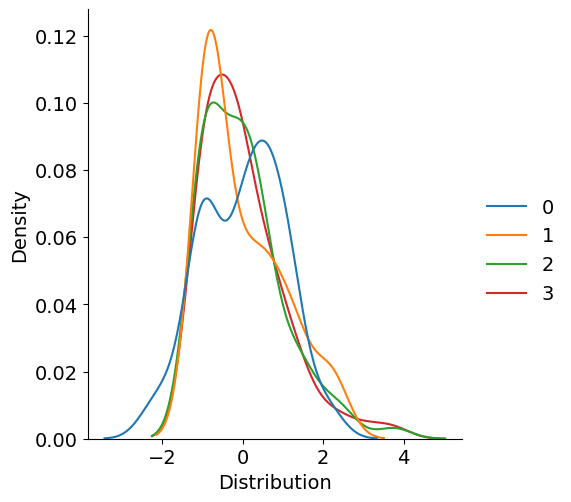

In [20]:
distplot_samples(data_scaled)

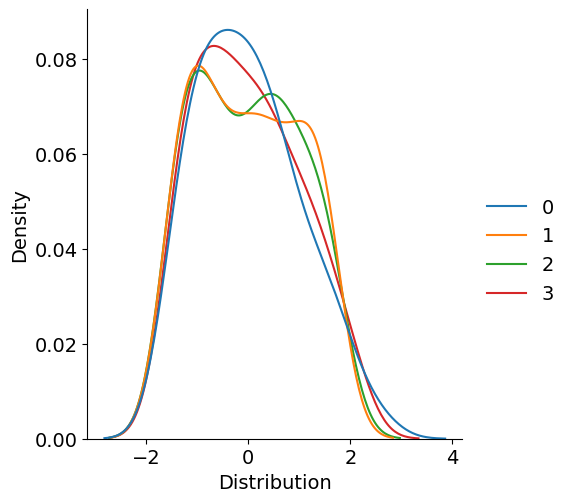

In [21]:
distplot_samples(all_val_samples_scaled)

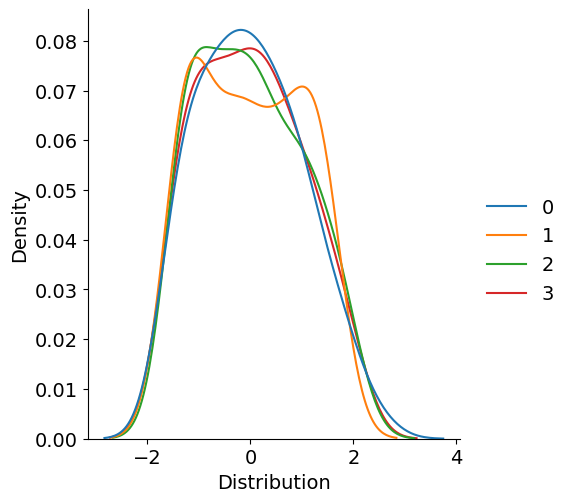

In [22]:
distplot_samples(all_val_samples_mdu_scaled)

#### Distribution subplots of scaled data

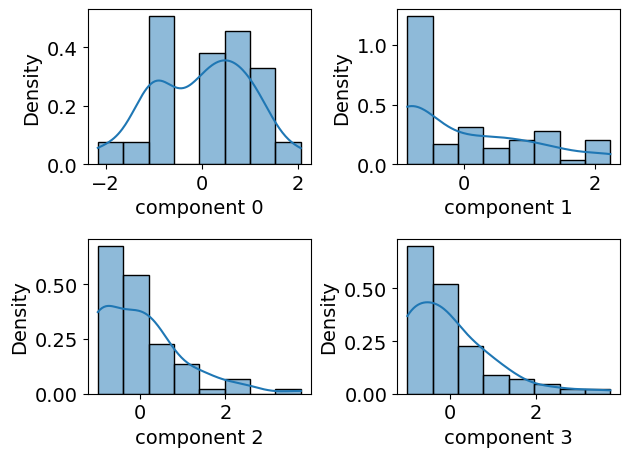

In [23]:
box_kdeplot_samples(data_scaled)

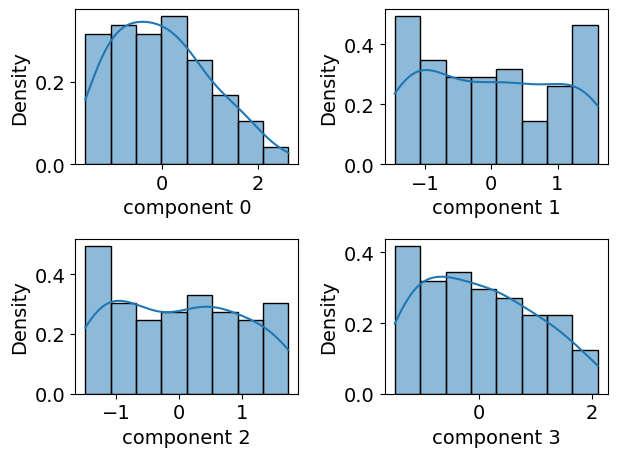

In [24]:
box_kdeplot_samples(all_val_samples_scaled)

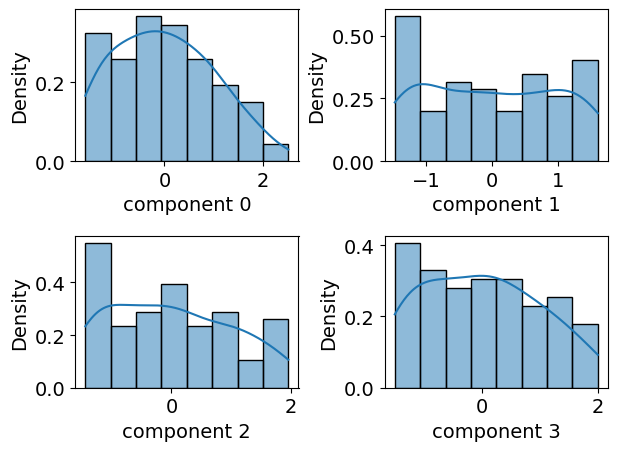

In [25]:
box_kdeplot_samples(all_val_samples_mdu_scaled)

In [26]:
print("variance data", pd.DataFrame(data_scaled).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_scaled).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(all_val_samples_scaled).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(all_val_samples_scaled).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(all_val_samples_mdu_scaled).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(all_val_samples_mdu_scaled).var(axis='index').to_numpy()))

variance data [1.01351351 1.01351351 1.01351351 1.01351351]
variance norm data 2.0270270270270276
variance lhs [1.01123596 1.01123596 1.01123596 1.01123596]
variance norm lhs 2.0224719101123596
variance lhsmdu [1.01123596 1.01123596 1.01123596 1.01123596]
variance norm lhsmdu 2.0224719101123596


#### Distribution plots of unscaled data:

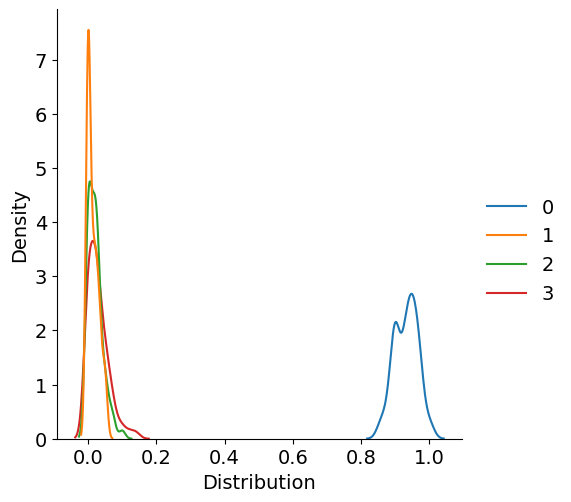

In [27]:
distplot_samples(data_array)

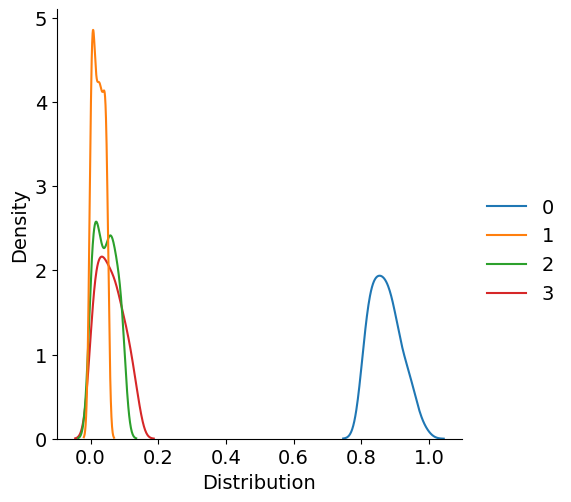

In [28]:
distplot_samples(all_val_samples)

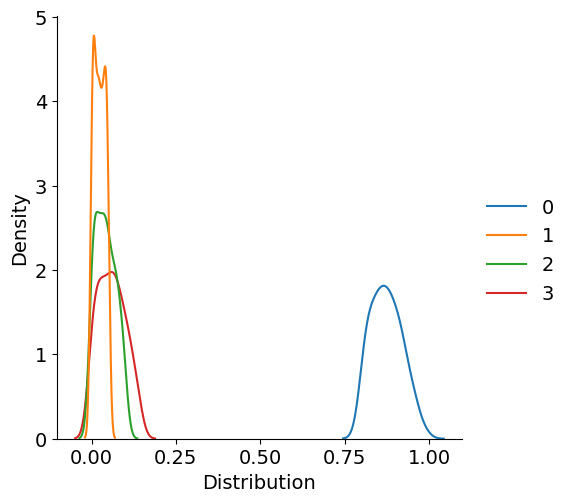

In [29]:
distplot_samples(all_val_samples_mdu)

#### Distribution subplots of unscaled data

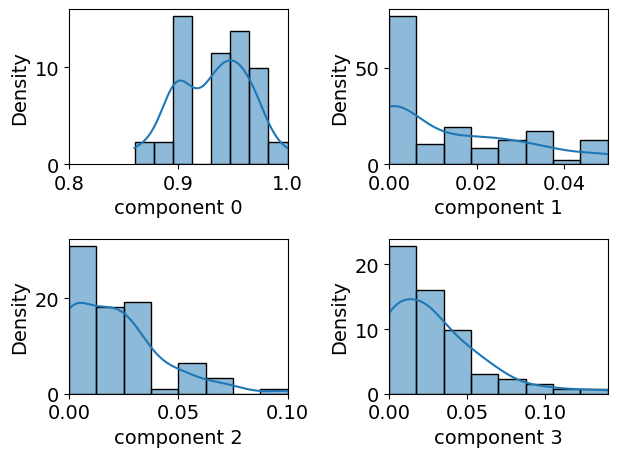

In [30]:
box_kdeplot_samples(data_array, fixed_ranges=bounds)

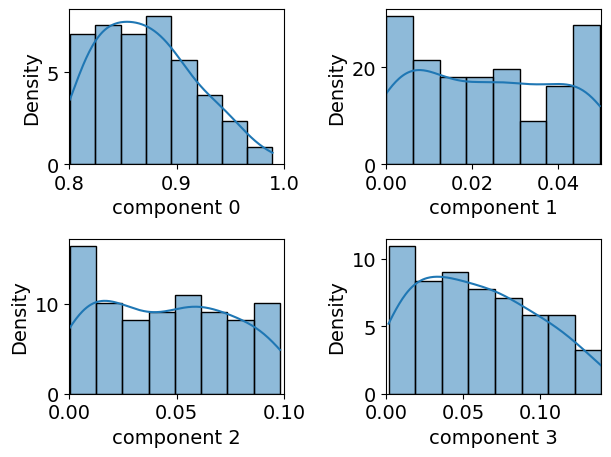

In [31]:
box_kdeplot_samples(all_val_samples, fixed_ranges=bounds)

In [32]:
for i in range(len(all_val_samples)):
    if all_val_samples[i,1]>0.05:
        print(i)

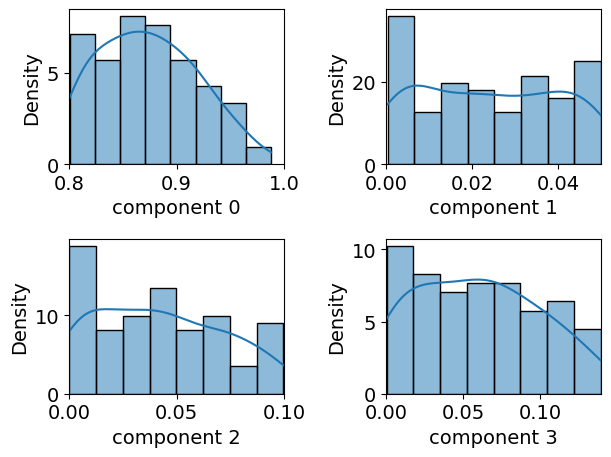

In [33]:
box_kdeplot_samples(all_val_samples_mdu, fixed_ranges=bounds)

In [34]:
print("variance data", pd.DataFrame(data_array).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_array).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(all_val_samples).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(all_val_samples).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(all_val_samples_mdu).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(all_val_samples_mdu).var(axis='index').to_numpy()))

variance data [0.00111723 0.00026392 0.00045051 0.00089448]
variance norm data 0.0015234484669681624
variance lhs [0.00200225 0.00026503 0.00091583 0.00148113]
variance norm lhs 0.0026667870499800708
variance lhsmdu [0.00207745 0.00026008 0.00086695 0.00159495]
variance norm lhsmdu 0.0027710836908275607


#### Distribution plots of scaled reduced data

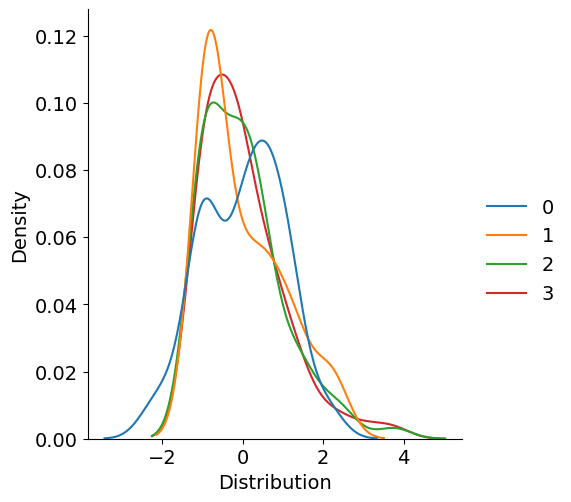

In [35]:
distplot_samples(data_scaled)

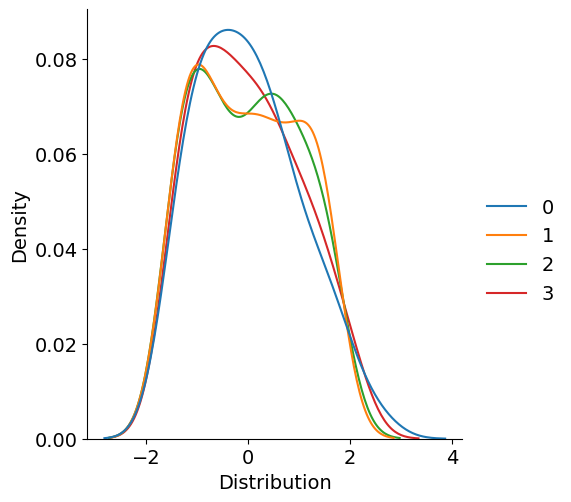

In [36]:
distplot_samples(tol_samples)

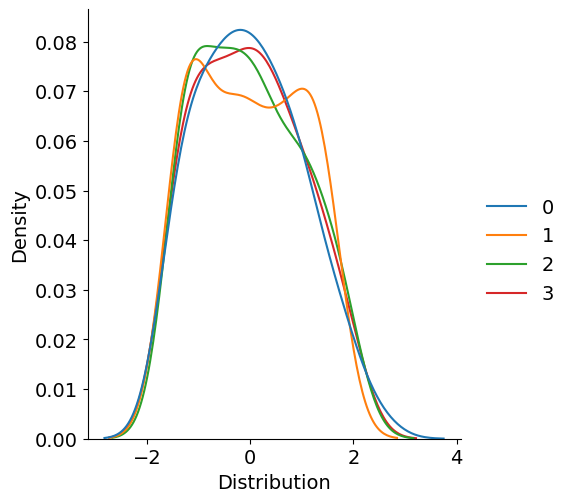

In [37]:
distplot_samples(tol_samples_LHSMDU)

#### Distribution subplots of scaled reduced data

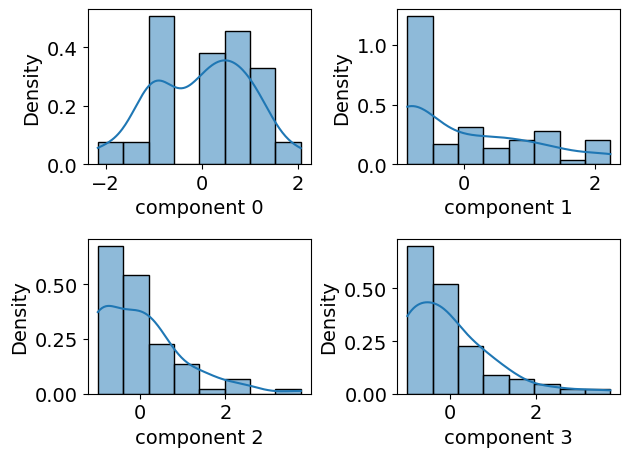

In [38]:
box_kdeplot_samples(data_scaled)

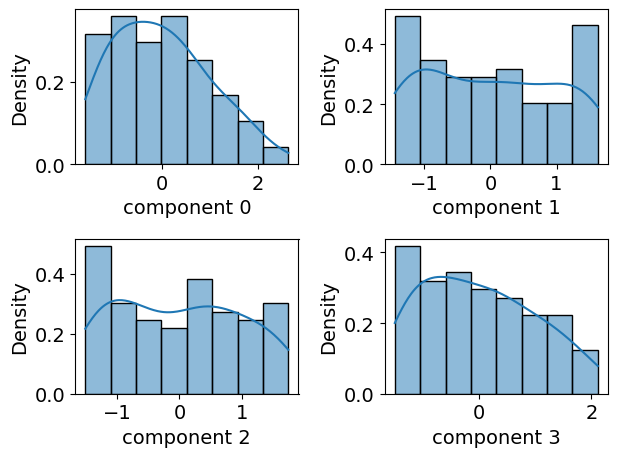

In [39]:
box_kdeplot_samples(tol_samples)


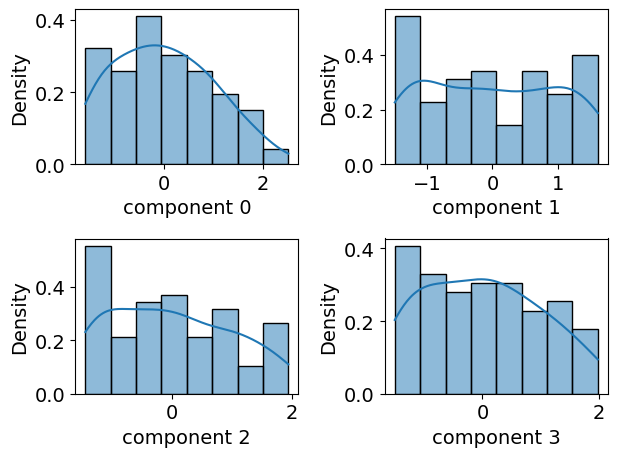

In [40]:
box_kdeplot_samples(tol_samples_LHSMDU)

#### Variances

In [41]:
print("variance data", pd.DataFrame(data_scaled).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_scaled).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(tol_samples).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(tol_samples).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(tol_samples_LHSMDU).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(tol_samples_LHSMDU).var(axis='index').to_numpy()))

variance data [1.01351351 1.01351351 1.01351351 1.01351351]
variance norm data 2.0270270270270276
variance lhs [1.01120539 1.01135245 1.01130116 1.0112951 ]
variance norm lhs 2.022577052269391
variance lhsmdu [1.01119271 1.0113051  1.01133629 1.01111995]
variance norm lhsmdu 2.0224770356682193


#### Distribution plots of unscaled reduced data:

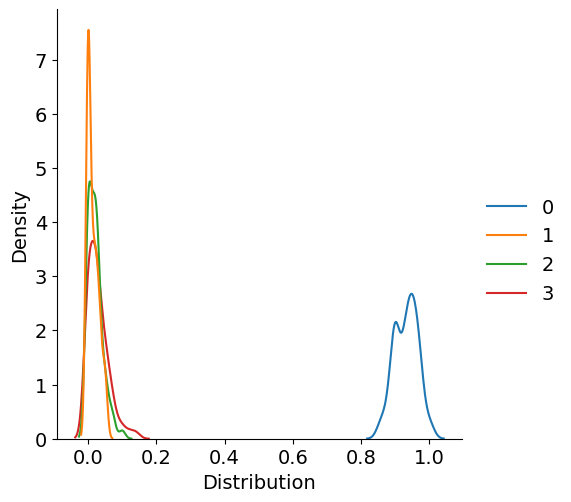

In [42]:
distplot_samples(data_array)

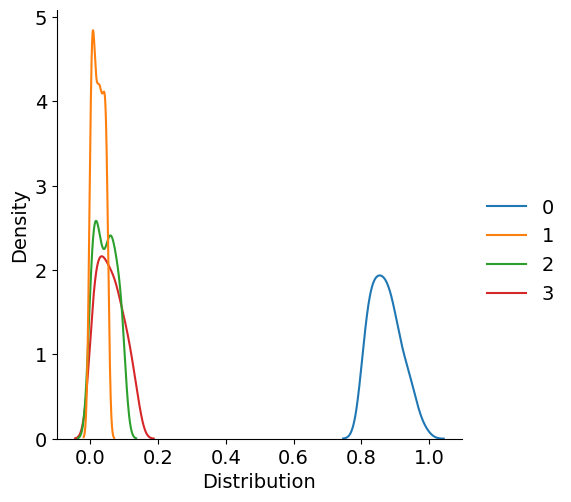

In [43]:
distplot_samples(tol_samples_unscaled)

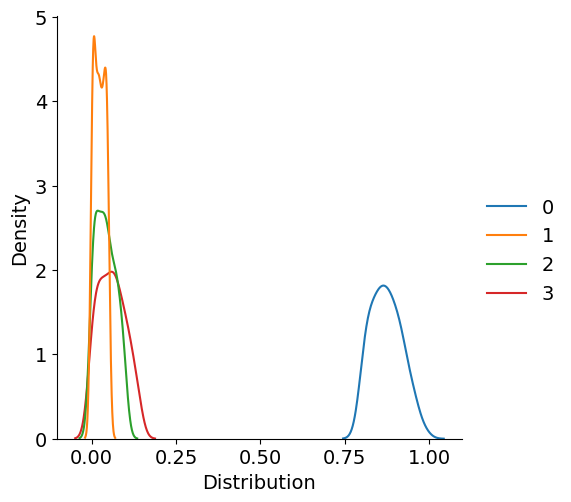

In [44]:
distplot_samples(tol_samples_LHSMDU_unscaled)

#### Distribution subplots of unscaled reduced data

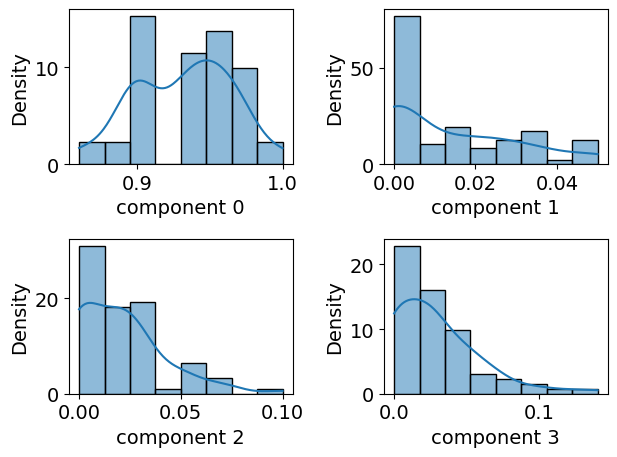

In [45]:
box_kdeplot_samples(data_array)

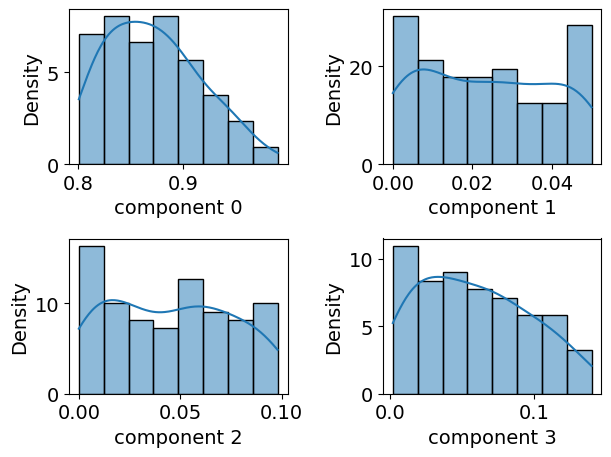

In [46]:
box_kdeplot_samples(tol_samples_unscaled)

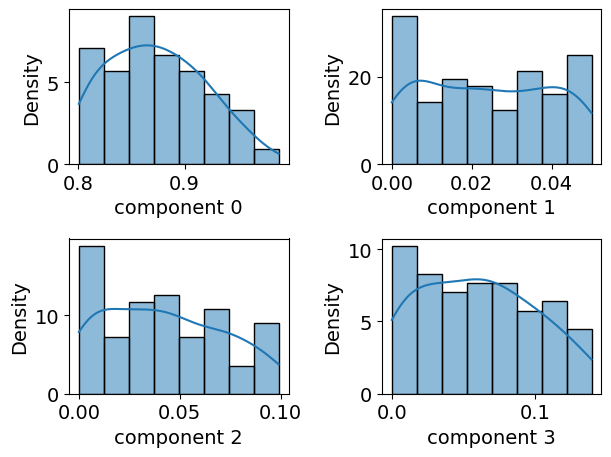

In [47]:
box_kdeplot_samples(tol_samples_LHSMDU_unscaled)

In [48]:
print("variance data", pd.DataFrame(data_array).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_array).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(tol_samples_unscaled).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(tol_samples_unscaled).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(tol_samples_LHSMDU_unscaled).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(tol_samples_LHSMDU_unscaled).var(axis='index').to_numpy()))

variance data [0.00111723 0.00026392 0.00045051 0.00089448]
variance norm data 0.0015234484669681624
variance lhs [0.00200017 0.00026778 0.00091917 0.00147833]
variance norm lhs 0.0026650930393970988
variance lhsmdu [0.0020814  0.00025976 0.00086618 0.00159799]
variance norm lhsmdu 0.002775520474198394


### **5. Write results to csv files**

In [49]:
tol_samples_unscaled_df = pd.DataFrame(tol_samples_unscaled)
tol_samples_LHSMDU_unscaled_df = pd.DataFrame(tol_samples_LHSMDU_unscaled)

In [50]:
filepath = Path('Outputs/LHS_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath, tol_samples_unscaled_df)

filepath2 = Path('Outputs/LHSMDU_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath2, tol_samples_LHSMDU_unscaled_df)

In [51]:
all_val_samples_df = pd.DataFrame(all_val_samples)
all_val_samples_mdu_df = pd.DataFrame(all_val_samples_mdu)

In [52]:
filepath3 = Path('Outputs/LHS_with_new_permutations_correct_all_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath3, all_val_samples_df)

filepath4 = Path('Outputs/LHSMDU_with_new_permutations_correct_all_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath4, all_val_samples_mdu_df)

### **6. Show results**

In [53]:
tol_samples_unscaled_df

,0,1,2,3
0,0.922,0.023,0.017,0.037
1,0.892,0.007,0.038,0.062
2,0.901,0.023,0.028,0.048
3,0.916,0.008,0.009,0.066
4,0.874,0.049,0.039,0.038
...,...,...,...,...
85,0.912,0.048,0.003,0.037
86,0.952,0.031,0.003,0.014
87,0.860,0.000,0.095,0.045
88,0.821,0.029,0.010,0.140


In [54]:
tol_samples_LHSMDU_unscaled_df

,0,1,2,3
0,0.900,0.024,0.014,0.061
1,0.926,0.014,0.031,0.028
2,0.904,0.032,0.043,0.020
3,0.891,0.006,0.039,0.064
4,0.864,0.044,0.022,0.070
...,...,...,...,...
85,0.816,0.030,0.099,0.054
86,0.806,0.046,0.088,0.060
87,0.953,0.033,0.003,0.011
88,0.923,0.047,0.006,0.024


#### Normalize such that add up to 1 and perform check

In [55]:
for i in range(len(tol_samples_unscaled_df)):
    if sum(tol_samples_unscaled_df.iloc[i,:])!=1:
        for j in range(len(tol_samples_unscaled_df.columns)):
            tol_samples_unscaled_df.iloc[i,j] = np.around(tol_samples_unscaled_df.iloc[i,j]/sum(tol_samples_unscaled_df.iloc[i,:]),3)

In [56]:
for i in range(len(tol_samples_unscaled_df)):
    if sum(tol_samples_unscaled_df.iloc[i,:])!=1:
        print(i,sum(tol_samples_unscaled_df.iloc[i,:]))

17 0.9999999999999999
22 0.9999999999999999
48 1.0000000000000002
75 1.0000000000000002


In [57]:
for i in range(len(tol_samples_LHSMDU_unscaled_df)):
    if sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:])!=1:
        for j in range(len(tol_samples_LHSMDU_unscaled_df.columns)):
            tol_samples_LHSMDU_unscaled_df.iloc[i,j] = np.around(tol_samples_LHSMDU_unscaled_df.iloc[i,j]/sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:]),3)

In [58]:
for i in range(len(tol_samples_LHSMDU_unscaled_df)):
    if sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:])!=1:
        print(i,sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:]))

8 0.9999999999999999
15 0.9999999999999999
45 0.9999999999999999
73 1.0000000000000002
75 1.0000000000000002


In [59]:
tol_samples_unscaled_df

,0,1,2,3
0,0.923,0.023,0.017,0.037
1,0.893,0.007,0.038,0.062
2,0.901,0.023,0.028,0.048
3,0.917,0.008,0.009,0.066
4,0.874,0.049,0.039,0.038
...,...,...,...,...
85,0.912,0.048,0.003,0.037
86,0.952,0.031,0.003,0.014
87,0.860,0.000,0.095,0.045
88,0.821,0.029,0.010,0.140


In [60]:
tol_samples_LHSMDU_unscaled_df

,0,1,2,3
0,0.901,0.024,0.014,0.061
1,0.927,0.014,0.031,0.028
2,0.905,0.032,0.043,0.020
3,0.891,0.006,0.039,0.064
4,0.864,0.044,0.022,0.070
...,...,...,...,...
85,0.817,0.030,0.099,0.054
86,0.806,0.046,0.088,0.060
87,0.953,0.033,0.003,0.011
88,0.923,0.047,0.006,0.024


#### Test whether all selected samples are feasible

In [61]:
for i in range(len(tol_samples_unscaled)):
    for j in range(dim):
        if tol_samples_unscaled[i,j]<prev_bounds[j][0] or tol_samples_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_unscaled[i,:])
print("-------------------")
for i in range(len(tol_samples_LHSMDU_unscaled)):
    for j in range(dim):
        if tol_samples_LHSMDU_unscaled[i,j]<prev_bounds[j][0] or tol_samples_LHSMDU_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_LHSMDU_unscaled[i,:])

-------------------


In [62]:
for i in range(len(tol_samples_unscaled)):
    for j in range(dim):
        if tol_samples_unscaled[i,j]<prev_bounds[j][0] or tol_samples_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_unscaled[i,:])
print("-------------------")
for i in range(len(tol_samples_LHSMDU_unscaled)):
    for j in range(dim):
        if tol_samples_LHSMDU_unscaled[i,j]<prev_bounds[j][0] or tol_samples_LHSMDU_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_LHSMDU_unscaled[i,:])

-------------------
